---
title: "The World's Happiness"
description: "An Analysis on Variables that Affect Happiness"
author: "Tiffany Li"
date: "08/1/2023"
image: SmileyFaceCover.jpg
date-modified: "08/4/2023"
---

## Introduction
Different people have different purposes in life: some want to have a successful career, some want to be filthy rich, some want a family, but above everything, humans naturally want to be happy. This project explores the happiness of people from different countries and the some of the many variables that may contribute to one's happiness.

### Research Questions

For this assignment, I decided to compare the happiness variable factors of different countries, contrasting those of high rankings and those with low. I am curious to know:
* Which variable plays the largest factor in the happiness of each country?
* Does that variable have any correlation with other vairables? What examples can we use to support these relationships?



### About the Data

The datasets highlighted in this assignment aims to analyze the happiness of citizens in each country, focusing on different variables that may influence them. One dataset discusses the changes of these variables in each country over the years while the other dataset describes the 2022 happiness scores of each country with the supporting variable scores. 


The first dataset, "Happiness Report", displays all the data collected about each country and the corresponding year they collected the data. To understand the variables in this dataset listed in the columns, I turned to the appendix of the report I collected this data from.

* **Life ladder** is an average made of up where citizens feel they stand on a scale of 0-10 regarding their happiness in life. 
* **Log GDP per capita** is data taken from the World Development Indicators  
* **Healthy life expectancy at birth** is data taken from the World Health Organization (WHO). 
* **Freedom to make life choices** is the average for a binary response to a question asking whether or not they are satisfied with their freedom to choose what they want to do with their lives.
* **Generosity** is the average for a binary response to a question asking whether or not they have donated money in the past month.
* **Perceptions of corruption**	is the average for two binary responses to the questions on whether or not corruption is spread throughout the government and whether or not corruption is spread throughout businesses.
* **Positive affect** is the average to responses on questions asking about whether or not they laughed, felt enjoyment, and did interesting things the day before.
* **Negative affect** is the average to responses on questions asking whether or not they worried, felt sadness, and anger the day before. 
* **Confidence in national government** is the average made up of whether or not citizens felt confidence in their government.

The second dataset, "Happiness Score", includes values generated from regressions run on each variable to determine how much they affect happiness. These values are added up to get a summed happiness score, which the rankings are based on, with the highest happiness score being at the top of the ranks and the lowest being at the bottom. Dystopia is a factor created to highlight the effects of the 6 variables on a hypothetical country with statistics made up of the world's lowest national averages. This value allows all countries to have a zero or positive score for the different variables.
 

## Findings

In order to understand and analyze the information provided to me in this dataset, I set off to look into what each of them discussed. After learning about my dataset, I decided to dive into the different variables through data exploration and their correlations with each other. Here's what I found:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Happiness_Report = 'HappinessReportCSV.csv'
Happiness_Score = 'HappinessScoreData.csv'
df1 = pd.read_csv(Happiness_Report)
df2 = pd.read_csv(Happiness_Score)

During my data exploration, I observed that GDP per capita consistently emerges as one of the most significant contributors to happiness. This observation is evident across the highest and lowest ranked countries for happiness, as depicted in the visualizations below. Although some variability exists among the most critical factors in some of these graphs, it is evident that GDP per capita remains a prominent influence. This suggests that money plays a crucial role in people's happiness, as GDP per capita reflects the average economic output and income per person in each country.

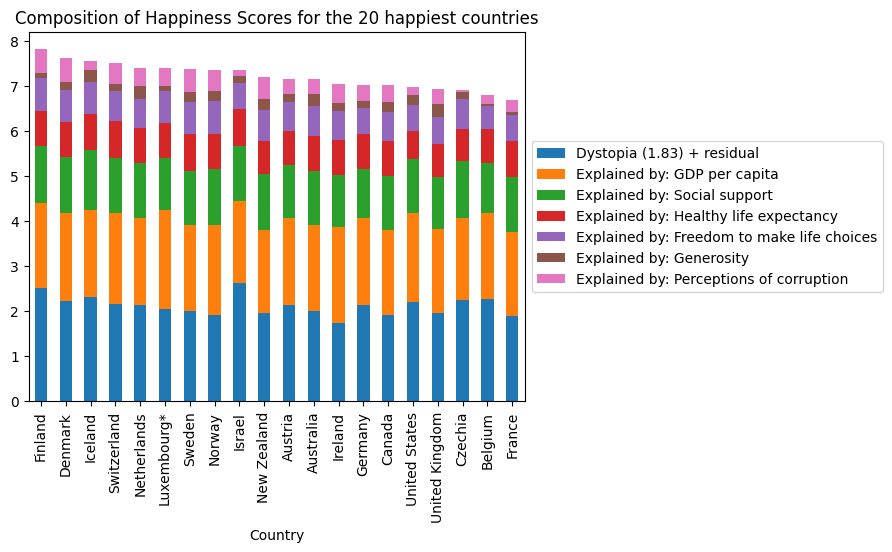

In [2]:
top20 = df2.loc[df2['RANK'] <= 20, (df2.columns.str.contains('Expl')) | 
                       (df2.columns.str.contains('Dys')) |
                        (df2.columns.str.contains('Country'))].copy()
top20.plot.bar(x='Country', stacked=True)
plt.title('Composition of Happiness Scores for the 20 happiest countries')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

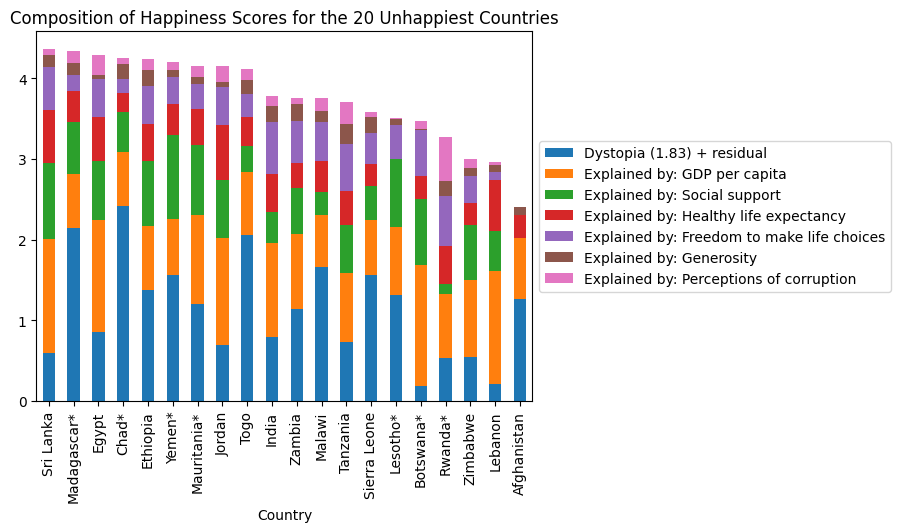

In [3]:
lowest = (df2['RANK'] > 126) & (df2['RANK'] <= 146)
bottom20 = df2.loc[lowest, (df2.columns.str.contains('Expl')) | 
                       (df2.columns.str.contains('Dys')) |
                        (df2.columns.str.contains('Country'))].copy()
bottom20.plot.bar(x='Country', stacked=True)
plt.title('Composition of Happiness Scores for the 20 Unhappiest Countries')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Because we understand that GDP per capita plays a large role in one's happiness, we must also look to see if it has any correlation with other variables. This is important as it can help us identify multicollinearity as well as understand if the influence of a variable is actually greated than depicted in the data.

Text(0.5, 1.0, 'Correlation between Log GDP per Capita and Social Support in All Countries')

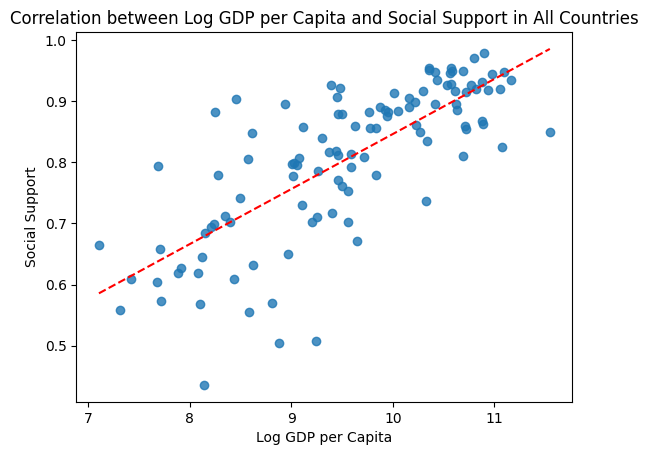

In [4]:
df1_2021 = df1.loc[df1['year'] == 2021]
sns.regplot(df1_2021, x='Log GDP per capita',y='Social support', line_kws={'color': 'red', 'linestyle': '--', 'linewidth':1.5}, ci = None)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Social Support')
plt.title('Correlation between Log GDP per Capita and Social Support in All Countries')

By analyzing this graph that illustrates the relationship between social support and log GDP per capita in each country, we are able to identify whether or not they are correlated. Based on my visualization, we see that there *is* a positive relationship between the two variables. This sugggests that as individuals contribute more to the economy and experience higher income levels, social support among them also increases.

Text(0.5, 1.0, 'Correlation between Log GDP per Capita and Healthy Life Expectancy at Birth in All Countries')

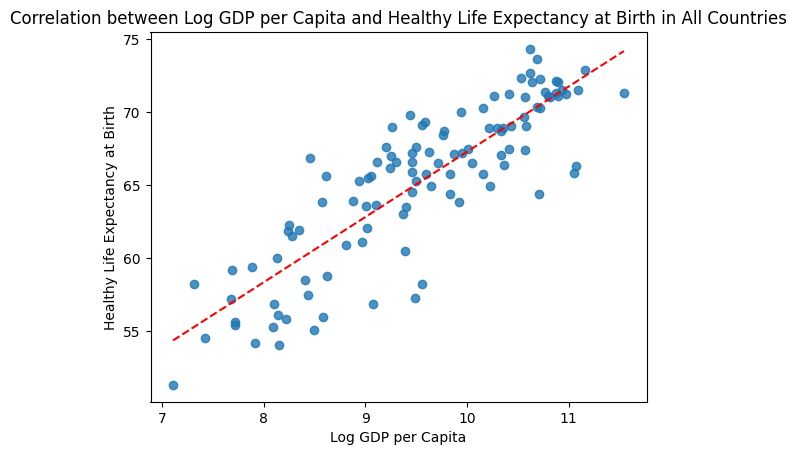

In [5]:
sns.regplot(df1_2021, x='Log GDP per capita',y='Healthy life expectancy at birth', line_kws={'color': 'red', 'linestyle': '--', 'linewidth':1.5}, ci = None)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Healthy Life Expectancy at Birth')
plt.title('Correlation between Log GDP per Capita and Healthy Life Expectancy at Birth in All Countries')

Next, we will examine the relationship between health life expectancy at birth and log GDP per capita, as shown in the graph above. The visualization suggests a positive correlation, indicating that GDP has an impact on life expectancy. As individuals experience higher income levels and contribute more to the economy, their life expectancies increase, leading to a healthier and, consequently, happier life.

Text(0.5, 1.0, 'Correlation between Log GDP per Capita and Freedom to Make Life Choices in All Countries')

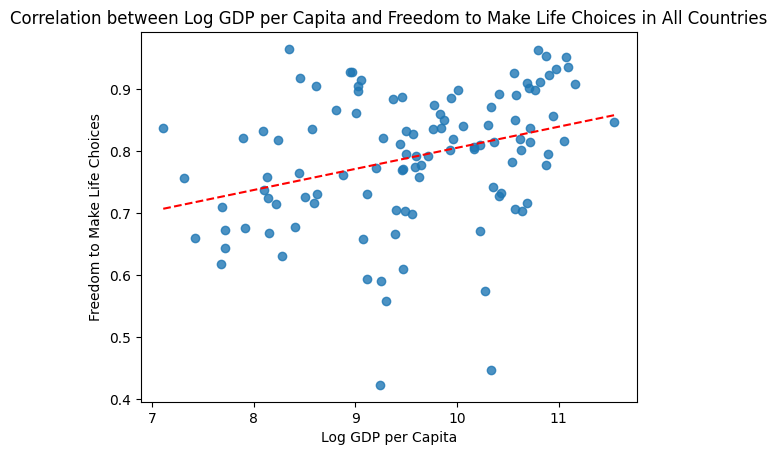

In [6]:
sns.regplot(df1_2021, x='Log GDP per capita',y='Freedom to make life choices', line_kws={'color': 'red', 'linestyle': '--', 'linewidth':1.5}, ci = None)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Freedom to Make Life Choices')
plt.title('Correlation between Log GDP per Capita and Freedom to Make Life Choices in All Countries')

The visualization above depicts the freedom to make life choices in respect to log GDP per capita. This trendline suggests a very slight positive correlation, indicating that higher income brings you greater freedom. However, it is also important to note the amount of outliers in this visualization, which may mean GDP doesn't have *that* strong of a relationship with the freedom to make life choices or that there may be other implications.

Text(0.5, 1.0, 'Correlation between Log GDP per Capita and Generosity in All Countries')

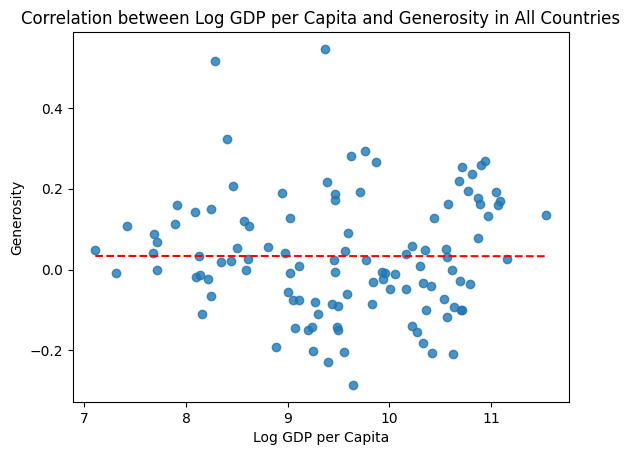

In [7]:
sns.regplot(df1_2021, x='Log GDP per capita',y='Generosity', line_kws={'color': 'red', 'linestyle': '--', 'linewidth':1.5}, ci = None)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Generosity')
plt.title('Correlation between Log GDP per Capita and Generosity in All Countries')

This next visualization examines whether or not there is a relationship between generosity in respect to log GDP per capita. Because the trendline is horizontal, it implies that there is no relationship between the two. The average generosity contribution is the same whether or not the GDP increases nor decreases. 

Text(0.5, 1.0, 'Correlation between Log GDP per Capita and Perceptions of Corruption in All Countries')

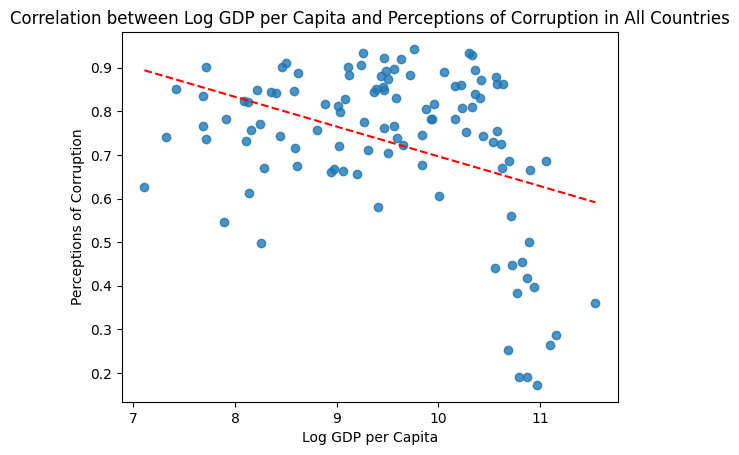

In [8]:
sns.regplot(df1_2021, x='Log GDP per capita',y='Perceptions of corruption', line_kws={'color': 'red', 'linestyle': '--', 'linewidth':1.5}, ci = None)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Perceptions of Corruption')
plt.title('Correlation between Log GDP per Capita and Perceptions of Corruption in All Countries')

This final plot analyzes the relationship between the perceptions of corruption in respect to log GDP per capita. Based on this visualization, there is a negative correlation between the two variables: as log GDP per capita increases, the perceptions of corruption decrease.

## Findings & Analysis

### GDP per capita vs. Happiness

Based on our data visualizations, we found that GDP per capital significantly contributes to countries’ happiness scores. GDP is a measure of an economy’s overall performance, encompassing production, expenditures and citizens’ income. Oftentimes, countries with a higher GDP are industrialized countries with tons of technological advances due to their ability to garner resources. This finding indicating the contribution of GDP to one’s happiness suggests the significance of financial resources. While GDP in itself may not directly cause happiness, it reflects factors that influence the overall well-being of the human race. Adequate financial resources enable people to lead the lives they aspire to and access things that contribute to their happiness. Although the saying goes, "money can't buy happiness," it certainly plays a role in enhancing lifestyle choices and other factors that influence happiness, as we will discuss further.

### GDP per capita and Its Relation with Other Variables

#### Social Support

The first of our findings reveals a positive correlation between social support and log GDP per capita. This implies that as the flow of money increases, the level of support people can receive from one another also increases. As previously mentioned, an increase in GDP leads to a higher availability of resources, providing a variety of options for those in need of help. The improved availability of essential resources ensures more effective fulfillment of people's needs. Consequently, as GDP per capita increases, the willingness to support one another also rises. A growing GDP is often accompanied by increased income, which enhances people's willingness to assist their loved ones and those in need. With greater financial means and resources, individuals are better equipped to make positive contributions to their communities, fostering a stronger sense of unity and support among people. As a result of this all, this sense of community also brings people joy, increasing their overall happiness.


#### Healthy Life Expectancy at Birth

Another significant finding was the positive correlation between healthy life expectancy at birth and log GDP per capita. This implies that citizens living in more industrialized economies are likely to have longer life expectancies. Countries with a higher level of economic development possess the financial means and resources to promote better well-being. They can invest in advanced technology, research, and other resources that improve people's quality of life.

For instance, during the COVID pandemic, developed countries were better equipped to handle the crisis compared to non-developed countries. The availability of hospitals with advanced equipment and knowledgeable healthcare professionals enabled better treatment for affected patients, leading to access to medication for symptom relief. Developed nations also had the advantage of predicting and learning about the virus earlier, which facilitated the rapid development of vaccinations to prevent further spread. In contrast, developing countries faced more significant challenges and consequences due to limited resources.

The level of financial resources significantly contributes to the standard of living for people, impacting happiness levels and healthier lives. While happiness is influenced by various factors beyond money, wealth can indeed contribute to happiness and provide a sense of security in our lives. This association between GDP, healthier lives, and happiness underscores the importance of economic development in enhancing overall well-being and life quality.

#### Freedom to Make Life Choices

The next visualization led us to uncover that log GDP per capita also influences the freedom to make life choices, demonstrating a predominantly positive relationship. This suggests that as the flow of money increases and the economy improves, people's freedom to make choices also increases. Financial resources give individuals the ability to make decisions according to their preferences, granting them control over their lives. Conversely, a lack of financial means can restrict one's options, as they may rely on resources that are not their own or unavailable to them. It is often said that money is power, and in the world we inhabit, this sentiment holds true.

However, our visualization also revealed outliers, indicating that higher GDP does not always equate to higher freedom. This is because various other factors may limit one's ability to exercise personal choices, such as social, cultural, or political constraints. While money can enhance freedom to some extent, it may not entirely overcome all external restrictions that individuals face. Consequently, achieving true freedom often involves addressing multifaceted societal factors beyond GDP alone.

#### Generosity

The subsequent visualization shed light on the relationship between generosity and GDP per capita, revealing a surprising finding - the two are not highly correlated. This unexpected result challenges the assumption that an increase in financial resources would automatically lead to a greater willingness to help others. Initially, I had anticipated that higher GDP would reflect a similar pattern as seen in the relationship between GDP and social support.

However, the lack of a strong correlation between higher GDP and greater generosity can be attributed to several factors. Firstly, GDP does not solely indicate individual wealth; it encompasses various production factors, and income disparities may exist within the population. Consequently, financial resources may not be equally distributed, limiting the capacity for generosity among certain demographics.

Moreover, cultural and social factors play a significant role in shaping people's attitudes towards giving. Cultural norms, traditions, and social expectations can either encourage or discourage acts of generosity, regardless of GDP levels. Thus, even in countries with higher GDP, cultural and social limitations may hinder people from actively donating to others.

In summary, the surprising lack of a strong correlation between GDP per capita and generosity suggests that the relationship is more intricate than initially assumed. It emphasizes the importance of considering various economic, cultural, and social factors in understanding patterns of generosity across different societies.


#### Perceptions of Corruption


The final finding emerged from examining the relationship between perceptions of corruption and log GDP per capita. Our analysis revealed a negative correlation between these two factors, indicating that as GDP increases, perceptions of corruption tend to decrease. This trend can be attributed to the fact that countries with higher GDP are generally more developed, which often translates to stronger governance and well-established systems. The availability of greater financial resources enables these countries to create and enforce policies and regulations that enhance the overall functioning of their societies.

In contrast, corruption tends to thrive in environments with little regulation or stability. Countries with lower GDP may lack the necessary resources to effectively combat corruption, leading to its persistence. Although corruption is not solely determined by a country's GDP, it undeniably plays a significant role.

In summary, our findings suggest that higher GDP is associated with lower perceptions of corruption due to the benefits of increased resources and better governance that come with economic development. While GDP is not the sole determinant of corruption, it does contribute to shaping the environment in which corrupt practices can either flourish or be mitigated.


### Conclusion & The Big Picture

In conclusion, happiness is an extremely elaborate concept influenced by a myriad of variables. Throughout our exploration, we have uncovered various factors that contribute to the overall happiness levels of individuals and societies. While GDP per capita plays a role in shaping happiness itself, by influencing the other happiness variables like social support, healthier lives, freedom, generosity, and perceptions of corruption, it is just one piece of the puzzle. Other aspects, such as income distribution, social and cultural norms, government policies, and personal relationships, also significantly impact happiness. The complex interplay of these variables highlights the need for a comprehensive approach when understanding and promoting well-being. 

Studying the variables that influence happiness is of utmost importance in our pursuit of a better and more fulfilling life. Happiness is a fundamental aspect of human well-being, and understanding the factors that contribute to it can lead to more effective strategies for improving the quality of life for individuals and societies as a whole. By examining variables such as GDP per capita, social support, health, freedom, generosity, and perceptions of corruption, we gain valuable insights into the complex nature of happiness. This knowledge empowers policymakers, researchers, and individuals to make informed decisions and design interventions that promote happiness and well-being. As we navigate the complexities of human happiness, continued research and analysis of these variables hold the key to creating happier, healthier, and more harmonious societies for the benefit of all.

##### Citations

Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., & Wang, S. (Eds.). (2022). World Happiness Report 2022. New York: Sustainable Development Solutions Network.